In [3]:

import pandas as pd


In [ ]:
print(pd.__version__)

In [4]:
import matplotlib.pyplot as plt

In [6]:
dataframe = pd.read_csv("/home/user-05/Documents/Slidesnotes_ISPED/T.U. WEB-BASED DATA/7- Project/DATA/DATA_T/ContextData/SITE_ARR_LONLAT.CSV")

In [7]:
x = dataframe.lon
y = dataframe.lat

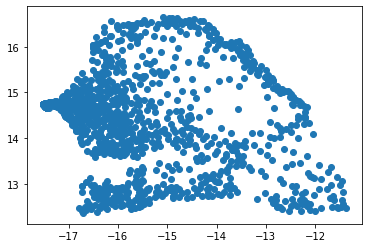

In [8]:
plt.scatter(x, y)

(array([12., 13., 14., 15., 16., 17.]), <a list of 6 Text yticklabel objects>)

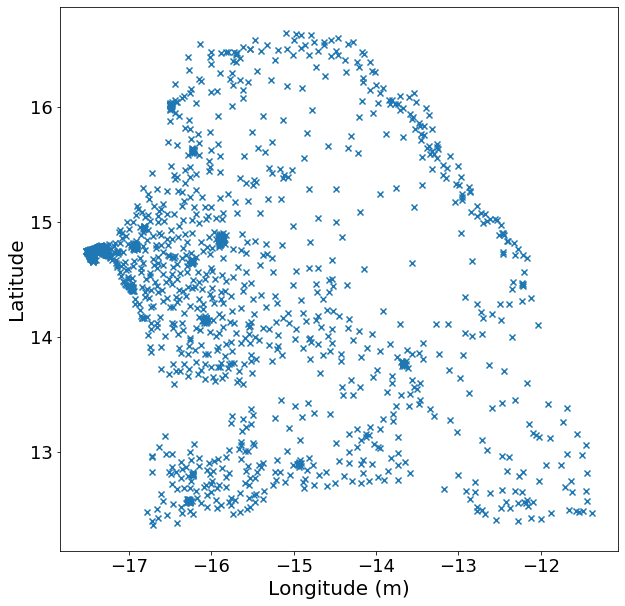

In [9]:
# Change the default figure size
plt.figure(figsize=(10,10))

# Change the default marker for the scatter from circles to x's
plt.scatter(x, y, marker='x')



# Add x and y lables, and set their font size
plt.xlabel("Longitude (m)", fontsize=20)
plt.ylabel("Latitude", fontsize=20)

# Set the font size of the number lables on the axes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

In [18]:
#1. Shapefiles
#Developed and regulated by Esri as a (mostly) open specification, 
#the shapefile format spatially describes geometries as either ‘points’, ‘polylines’, or ‘polygons’. 
#In OpenStreetMap terms these can be considered as ‘nodes’, ‘ways’ and ‘closed ways’, respectively. 
#Each geometry has a set of associated attributes.



In [19]:
#The shapefile is in fact a grouping of several files formatted to represent different aspects of geodata:
#.shp — shape format; the feature geometry itself.
#.shx — shape index format; a positional index of the feature geometry to allow seeking forwards and backwards quickly.
#.dbf — attribute format; columnar attributes for each shape, in dBase IV format.

#There are also several optional files in the shapefile format. The most significant of these is the .prj file #which describes the coordinate system and projection information used. Although not part of the Esri shapefile #standard, the .lyr file is often included as it contains specifications of how to display the data (colour, #labelling, etc) in ArcGIS software.

In [ ]:
#On this analysis, we will work with maps related to the regional that together, make the 
#Senegal country

In [ ]:
#-senegal_arr_2014_wgs.shp
#-senegal_arr_2014_wgs.shx
#-senegal_arr_2014_wgs.dbf
#-senegal_arr_2014_wgs.prj


In [37]:
#2. Installing Python Shapefile Library (PyShp)
#The Python Shapefile Library (pyshp) provides read and write support for the
#Esri Shapefile format. The Shapefile format is a popular Geographic
#Information System vector data format created by Esri.
#To Install pyshp, execute below instruction in your Terminal:

#pip install pyshp

In [ ]:
#3. Importing and initializing main Python libraries

In [71]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Initializing vizualization set

In [74]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [75]:
#and for  a Jupyter Notebook:
%matplotlib inline

In [ ]:
#NOTE:At the end we will draw a map: which is a group of several files, with name.shp being the main one,
# where the geographic features are saved. Important that all other files as 'name.shx', ' name.dbf', etc.,
#must be at same folder.

In [23]:
#with fiona
#pip install fiona, run this first in the terminal to install it
import fiona
shape = fiona.open("/home/user-05/Documents/Slidesnotes_ISPED/T.U. WEB-BASED DATA/7- Project/DATA/DATA_T/ContextData/Shapefile_Senegal/senegal_arr_2014_wgs.shp")
print (shape.schema)

{'properties': OrderedDict([('ARR_ID', 'int:11'), ('REG', 'str:50'), ('DEPT', 'str:50'), ('ARR', 'str:50')]), 'geometry': 'Polygon'}


In [26]:
#with PyShp; Before doing anything you must import the library.
import shapefile
shape = shapefile.Reader("/home/user-05/Documents/Slidesnotes_ISPED/T.U. WEB-BASED DATA/7- Project/DATA/DATA_T/ContextData/Shapefile_Senegal/senegal_arr_2014_wgs.shp")
#first feature of the shapefile
feature = shape.shapeRecords()[0]
first = feature.shape.__geo_interface__  
print (first) # (GeoJSON format)


{'type': 'Polygon', 'coordinates': (((-17.422836497522503, 14.76763682421794), (-17.423291088687385, 14.76734953317689), (-17.42375093263569, 14.767072458285616), (-17.4246295281516, 14.766538346772684), (-17.424631820782864, 14.766536952189046), (-17.424634112455706, 14.766535554905175), (-17.42592867935226, 14.765746134978905), (-17.426720515172857, 14.765278496799404), (-17.42701932113258, 14.765082234206494), (-17.42726085622434, 14.764893239765543), (-17.42810249321234, 14.764258412918554), (-17.428528291669625, 14.763953113612713), (-17.428694287856562, 14.763808116274564), (-17.428747369849543, 14.763761749547966), (-17.428961560096614, 14.763587238730668), (-17.429023811014694, 14.763546047023034), (-17.429158274029177, 14.763378858623785), (-17.429869601449493, 14.763234560305055), (-17.429892647702022, 14.763229885576319), (-17.4298922519523, 14.763227357428079), (-17.429727387224204, 14.762174471025741), (-17.42955014046707, 14.761263705600218), (-17.429472703195664, 14.7608

In [39]:
#You can get the a list of the shapefile’s geometry by calling the shapes() method.
shapes1 = shape.shapes()


In [40]:
#Let's check how many different "shapes" were imported by our function shp.Reader:


len(shapes1)

123

In [76]:
shape.records()[1]

Record #1: [2, 'DAKAR', 'DAKAR', 'ALMADIES']

In [79]:
shape.records()[1][3]

'ALMADIES'

In [ ]:
#Explanation: This means that exist 123 shapes on our shape files

In [41]:
#You can iterate through the shapefile’s geometry using the iterShapes() method.
len(list(shape.iterShapes()))

123

# Use Geopandas

In [46]:
#Reading a Shapefile
#Spatial data can be read easily with geopandas using gpd.from_file() -function:
# Import necessary modules
# Makes sure u go to terminal and type:  pip install geopandas
#then u can runthe below code

import geopandas as gpd

In [48]:
# Set filepath (fix path relative to yours)
fp = "/home/user-05/Documents/Slidesnotes_ISPED/T.U. WEB-BASED DATA/7- Project/DATA/DATA_T/ContextData/Shapefile_Senegal/senegal_arr_2014_wgs.shp"
# Read file using gpd.read_file()
data = gpd.read_file(fp)

In [49]:
#Let’s see what datatype is our ‘data’ variable
type(data)

geopandas.geodataframe.GeoDataFrame

In [ ]:
#Explanation: our data -variable is a GeoDataFrame. GeoDataFrame extends the functionalities of pandas.DataFrame 
#in a way that it is possible to use and handle spatial data within pandas (hence the name geopandas). 
#GeoDataFrame have some special features and functions that are useful in GIS


In [50]:
#Let’s take a look at our data and print the first 5 rows using the 
#head() -function prints the first 5 rows by default

data.head()

,ARR_ID,REG,DEPT,ARR,geometry
0,1,DAKAR,DAKAR,PARCELLES ASSAINIES,"POLYGON ((-17.42284 14.76764, -17.42329 14.767..."
1,2,DAKAR,DAKAR,ALMADIES,"MULTIPOLYGON (((-17.51195 14.75673, -17.51161 ..."
2,3,DAKAR,DAKAR,GRAND DAKAR,"POLYGON ((-17.42018 14.73348, -17.42003 14.733..."
3,4,DAKAR,DAKAR,DAKAR PLATEAU,"MULTIPOLYGON (((-17.43267 14.64669, -17.43276 ..."
4,5,DAKAR,GUEDIAWAYE,GUEDIAWAYE,"POLYGON ((-17.36185 14.79812, -17.35965 14.793..."


In [ ]:
#Explanation: (i.e. arrondissement in english is municipal district of certain cities)
#ARR_ID: the arrondissement_id, REG: the name of the region, DEPT: the name of the department,
#ARR: the name of the arrondissement

In [ ]:
#Let’s also take a look how our data looks like on a map. If you just want to explore your data on a map,
#you can use .plot() -function in geopandas that creates a simple map out of the data (uses matplotlib as a backend):

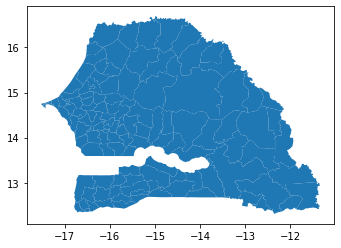

In [54]:
# Makes sure you install descartes before running the below code: pip install descartes

data.plot()

# Coordinate reference system (CRS)

In [ ]:
#Explanation:  
#GeoDataFrame that is read from a Shapefile contains always (well not always but should) information about
#the coordinate system in which the data is projected.
#We can see the current coordinate reference system from .crs attribute:

In [55]:
data.crs

{'init': 'epsg:4326'}

In [ ]:
#Explanation:
#so from this we can see that the data is something called epsg:4326. The 
#EPSG number (“European Petroleum Survey Group”) is a code that tells about the 
#coordinate system of the dataset. “EPSG Geodetic Parameter Dataset is a collection of 
#definitions of coordinate reference systems and coordinate transformations which may be global, 
#regional, national or local in application”. EPSG-number 4326 that we have here belongs to the WGS84 coordinate system (i.e. coordinates are in decimal degrees (lat, lon))

# Geometries in Geopandas

In [ ]:
#Geopandas takes advantage of Shapely’s geometric objects. 
#Geometries are stored in a column called geometry that is a default column name for storing geometric information in geopandas.

#Let’s print the first 5 rows of the column ‘geometry’:


In [56]:
## It is possible to use only specific columns by specifying the column name within square brackets []
data['geometry'].head()

0    POLYGON ((-17.42284 14.76764, -17.42329 14.767...
1    MULTIPOLYGON (((-17.51195 14.75673, -17.51161 ...
2    POLYGON ((-17.42018 14.73348, -17.42003 14.733...
3    MULTIPOLYGON (((-17.43267 14.64669, -17.43276 ...
4    POLYGON ((-17.36185 14.79812, -17.35965 14.793...
Name: geometry, dtype: geometry

In [ ]:
#Since spatial data is stored as Shapely objects, it is possible to use all of the functionalities of 
#Shapely module.

In [62]:
#Let’s print the areas of the first 5 polygons:
# Make a selection that contains only the first five rows
selection = data[0:5]


In [64]:
#We can iterate over the selected rows using a specific .iterrows() -function in (geo)pandas:
for index, row in selection.iterrows():
    poly_area = row['geometry'].area
print("Polygon area at index {0} is: {1:.3f}".format(index, poly_area))

Polygon area at index     4 is: 0.001


In [65]:
#Let’s create a new column into our GeoDataFrame where we calculate and store the areas individual polygons:
# Empty column for area
data['area'] = None

In [66]:
#Let’s iterate over the rows and calculate the areas
# Iterate rows one at the time

for index, row in data.iterrows():
    # Update the value in 'area' column with area information at index
    data.loc[index, 'area'] = row['geometry'].area

In [67]:
#Let’s see the first 2 rows of our ‘area’ column
data['area'].head(2)

0    0.00124374
1    0.00245702
Name: area, dtype: object

In [ ]:
#Let’s check what is the min and the max of those areas using familiar functions 
#from  numpy 

In [69]:
# Maximum area
max_area = data['area'].max()
# Minimum area
min_area = data['area'].mean()

In [70]:
print("Max area: %s\nMean area: %s" % (round(max_area, 2), round(min_area, 2)))

Max area: 1.17
Mean area: 0.13


# Plotting 

In [141]:
#shape = shapefile.Reader("/home/user-05/Documents/Slidesnotes_ISPED/T.U. WEB-BASED DATA/7- Project/DATA/DATA_T/ContextData/Shapefile_Senegal/senegal_arr_2014_wgs.shp")
shp_path = "/home/user-05/Documents/Slidesnotes_ISPED/T.U. WEB-BASED DATA/7- Project/DATA/DATA_T/ContextData/Shapefile_Senegal/senegal_arr_2014_wgs.shp"
sf = shp.Reader(shp_path)

In [ ]:
# Converting shapefile data on Pandas dataframe

In [142]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df


In [143]:
df = read_shapefile(sf)
df.shape

(123, 5)

In [ ]:
#The dataframe has a shape of (123, 5). What means that we we have 5 diferent features (columns) for each line


In [144]:
df.sample(5)

,ARR_ID,REG,DEPT,ARR,coords
55,56,KAOLACK,NIORO,PAOS KOTO,"[(-15.801549595504206, 13.910162407322902), (-..."
111,112,TAMBACOUNDA,GOUDIRY,KOULOR,"[(-13.180001615144748, 14.233658957067151), (-..."
38,39,FATICK,FOUNDIOUGNE,DJILOR,"[(-16.39502671750593, 14.147548797313794), (-1..."
106,107,TAMBACOUNDA,TAMBACOUNDA,KOUSSANAR,"[(-13.636838094897712, 14.407571549287558), (-..."
91,92,SEDHIOU,SEDHIOU,DJIBABOUYA,"[(-15.82606810163149, 12.93760303940236), (-15..."


In [ ]:
#The last column above is exactelly the coordinates, latitude and longitude, of every point that was used to create a specific map shape.

In [145]:
#How we can locate the GOSSAS ARR's id? Now with Pandas is very simple:
df[df.ARR == 'COLOBANE']

,ARR_ID,REG,DEPT,ARR,coords
30,31,FATICK,GOSSAS,COLOBANE,"[(-15.769350893499514, 14.732066138031113), (-..."


In [103]:
#With simple Pandas' s commands you can related the index (or id) with the ARR's name:

df.ARR

0      PARCELLES ASSAINIES
1                 ALMADIES
2              GRAND DAKAR
3            DAKAR PLATEAU
4               GUEDIAWAYE
5         PIKINE DAGOUDANE
6                 THIAROYE
7                   NIAYES
8                 RUFISQUE
9                 BAMBILOR
10             KEUR MOUSSA
11                  SINDIA
12                   NOTTO
13                THIENABA
14                  PAMBAL
15                 MEOUANE
16           MERINA DAKHAR
17                NIAKHENE
18               THIES SUD
19              THIES NORD
20                  FISSEL
21                 SESSENE
22                    TAIF
23                    KAEL
24                   NDAME
25                  NDOULO
26                  NDINDY
27                   NGOYE
28                 LAMBAYE
29             BABA GARAGE
              ...         
93           LOUDIA OUOLOF
94                 SINDIAN
95                TENGHORY
96                KATABA I
97                TENDOUCK
98                 NYASSIA
9

# Plotting a specific shape

In [ ]:
 #Here will see what a shape really is. For that, we should create a function to plot it. 
 #We will use the Python MatPlotLib library

In [146]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

In [ ]:
#The above function does two things: a) Plot the shape (polygon) based on the reg's coordinates and,
#b) calculate and return the medium point of that specific shape (x0, y0). 
#This medium point was also used to define where to print the reg/arr's name.

(-15.753293814330943, 14.59422191937917)

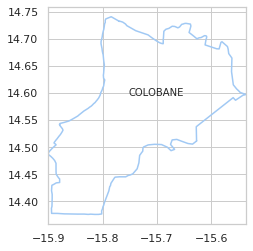

In [147]:

arr='COLOBANE'
ar_id = df[df.ARR ==arr].index.get_values()[0]
plot_shape(ar_id, arr)

In [ ]:
#For example, for our famous DAKAR region:

(-17.44446628885913, 14.748179390588366)

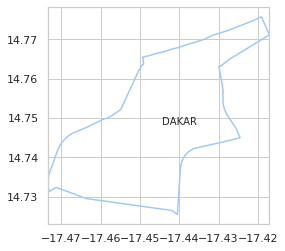

In [148]:
reg='DAKAR'
re_id = df[df.REG ==reg].index.get_values()[0]
plot_shape(re_id, reg)

In [ ]:
#Note: In above that we must know the shape id (index) to plot it, but we entered with the region's name: DAKAR. 
#Using Pandas was ease to calculate the id as you can see on the second line of the previous code.

# Plotting a complete map

In [ ]:
#NOTE: we must plot at same picture, all the shapes that are on our dataframe. 
#For that, we will use the following below function

In [149]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [ ]:
#The above function, by default, plot all shapes on a given 'df' file, including its shape id at middle of it. 
#Or a zoomed map will be plotted (w/o ids). You can change the function to print or not the ids

In [ ]:
##Plotting a full map:

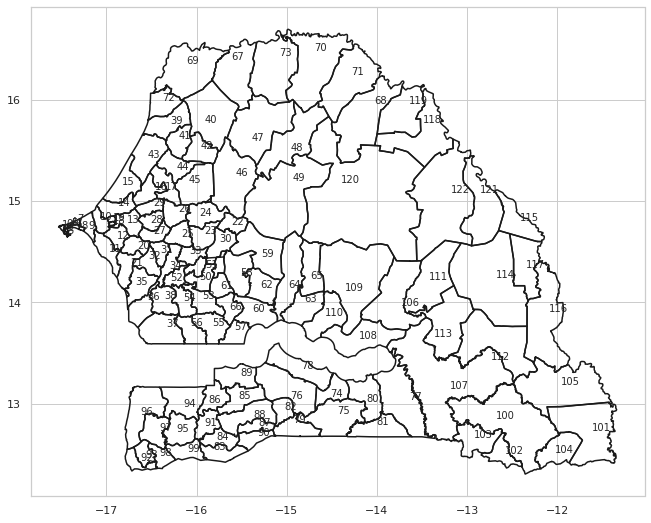

In [150]:
plot_map(sf)

In [ ]:
#Plotting a zommed map:

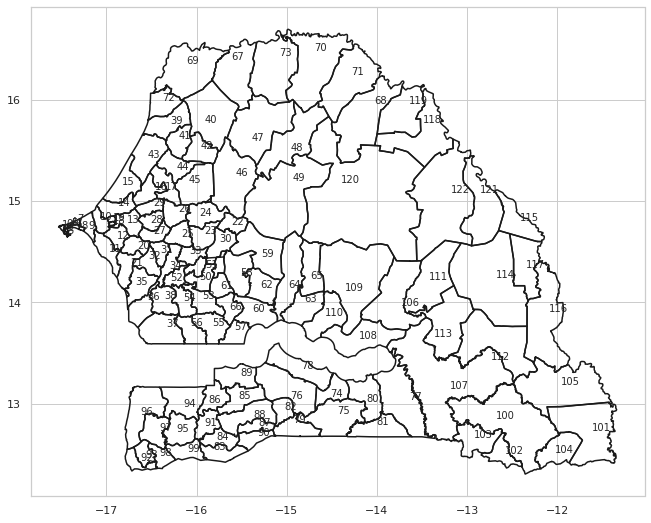

In [161]:
y_lim = None # latitude 
x_lim = None # longitude
plot_map(sf, x_lim, y_lim)

In [ ]:
#Plotting a single shape over a complete map

In [ ]:
#We can "merge" the two previous functions and "plot" a single shape inside a full map. 
#For that, let's write a new function, where the shape id is now an input parameter:

In [164]:
def plot_map2(id, sf, x_lim = None, y_lim = None, figsize=(11,9)):
    '''
    Plot map with lim coordinates
    '''
   
    plt.figure(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat, 'r', linewidth=3) 
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

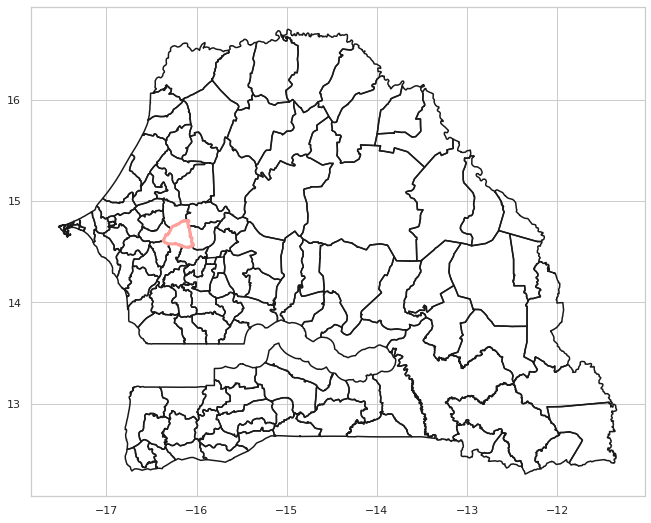

In [165]:
plot_map2(25, sf, x_lim, y_lim)

In [ ]:
#if we want to "fill" a single shape with a specific color? Simple! 
#We can use plt.fill for that. The function can be rewriten:

In [174]:
def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'g'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

<Figure size 792x648 with 0 Axes>

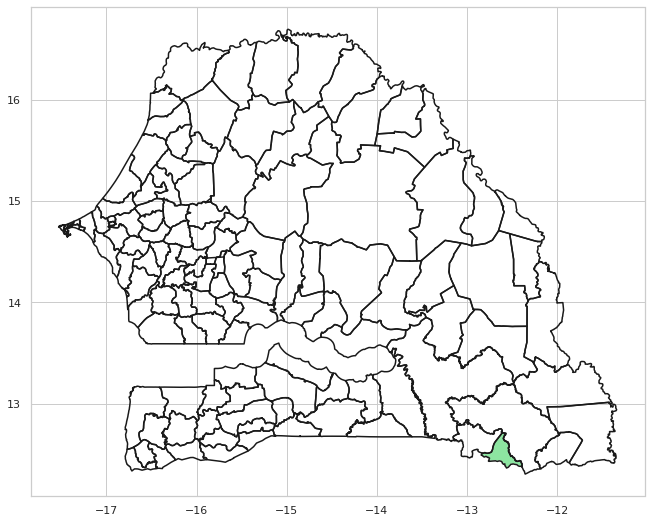

In [177]:
plot_map_fill(102, sf, x_lim, y_lim, color='g')

# Plotting multiple shapes on a full map


In [181]:
#create a map where several shapes are selected. For that, 
#insteady of having an id as input parameter, we will have a list of ids, 
#and will use a for loop to fill with color each one of them. The modified function is shown below:

In [183]:
def plot_map_fill_multiples_ids(title, comuna, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

<Figure size 792x648 with 0 Axes>

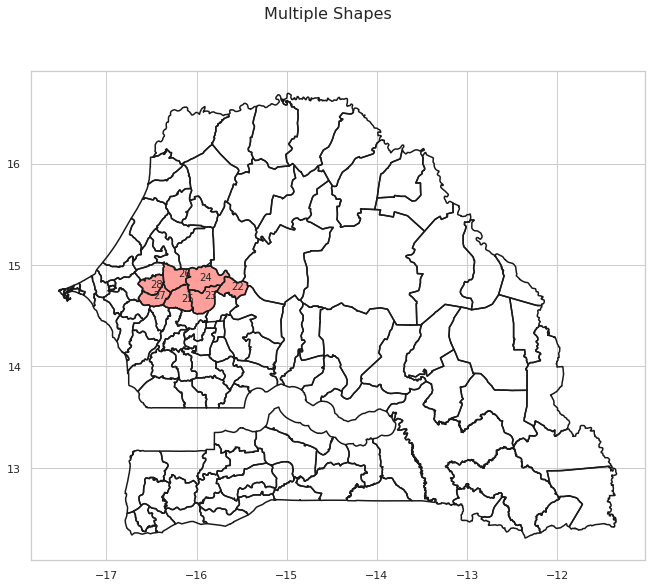

In [184]:
reg_id = [22, 23, 24, 25, 26, 27, 28]
plot_map_fill_multiples_ids("Multiple Shapes", 
                            reg_id, sf, color = 'r')

In [ ]:
#NOTE: In the above table you can also put the names instead of ids

# Creating 'Heat Maps'

In [ ]:
#A very useful type of map is to fill a specific shape with a color, 
#which "intensity" is proportional to a given value. Doing that, is possible to have a general
#overview about data distribution on a specific geographic area. For example, population distibution

#First we will create a function that once receiving a list of data, will split them on "bins". 
#For each one of those beans will get a specific color assigned. For experience, usually 5 to 7 bins 
#are good to have a good feeling of data distribution. We will use 6 bins and 4 different color palettes associated with those bins. You must select one of those bins at time.

In [198]:
def calc_color(data, color=None):
        if color   == 1: 
            color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0','#807dbaF0','#6a51a3F0','#54278fF0']; 
            colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3: 
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd','#969696','#636363','#252525']; 
            colors = 'Greys';
        elif color == 9: 
            color_sq = ['#ff0000','#ff0000','#ff0000','#ff0000','#ff0000','#ff0000'];
                        
        else:           
            color_sq = ['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1))
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [224]:
def plot_reg_data(sf, title, reg, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected region, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    re_id = []
    for i in reg:
        i = conv_reg(i).upper()
        re_id.append(df[df.REG == 
                            i.upper()].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, reg_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));

In [210]:
def plot_map_fill_multiples_ids_tone(sf, title, reg,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in reg:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[reg.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        

In [ ]:
#NOTE: Both functions plot_reg() and plot_map_fill_multiples_ids should be adapted 
#to take advantage of this new colored scheme: here i will use the last one..

# Plotting real data

In [ ]:
#Let's apply our Map functions to analyze how the population is distributed on Senegal country.

In [ ]:
#Reading dataset:


In [219]:
SET3M1 = pd.read_csv("/home/user-05/Documents/Slidesnotes_ISPED/T.U. WEB-BASED DATA/7- Project/DATA/DATA_T/SET3/SET3_M01.CSV",
                    sep = ',', names=['user_id','timestamp','arrondissement_id']) 
SET3M1.shape

(43034439, 3)

In [ ]:
# documentation said we had 146,352, with repetitionin data we have 43034439, how can we get only unique one?

In [221]:
SET3M1.head()

,user_id,timestamp,arrondissement_id
0,37509,2013-01-29 15:00:00,3
1,84009,2013-01-14 07:00:00,3
2,84009,2013-01-14 07:00:00,3
3,84009,2013-01-14 07:00:00,3
4,80150,2013-01-27 16:50:00,3


In [226]:
#title = 'Population Distrubution on Santiago Metropolitan Region'
#data = SET3M1.user_id
#names = SET3M1.timestamp
#plot_reg_data(sf, title, names, data, 4, True)

# Human movement analysis